# Toyota Corolla Price Regression Analysis

### 1. Overview
Columns: 
- Price (in euros)
- Age (years)
- KM (in odometer)
- FuelType (diesel or petroil)
- HP (horse power)
- MetColor (metalic color 1=yes, 0=no)
- Automatic (1=yes, 0=no)
- CC
- Doors 
- Weight (kg)

### 2. Importing Libraries and Reading the Dataset

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
%matplotlib inline
sns.set_style('darkgrid')

In [82]:
toyota_corolla_dataset = r"C:\Users\super\OneDrive\Escritorio\Vasudeva\Courses\ML Self Training\datasets\ToyotaCorolla.csv"
toyota = pd.read_csv(toyota_corolla_dataset)

### 3. Data Preprocessing and Visualization

In [83]:

toyota.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [84]:
toyota.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [85]:
print(toyota.shape) # 1436 samples with 9 features
toyota.isnull().sum()

(1436, 10)


Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

This is an example of a dataset that is clean and ready to work

<Axes: >

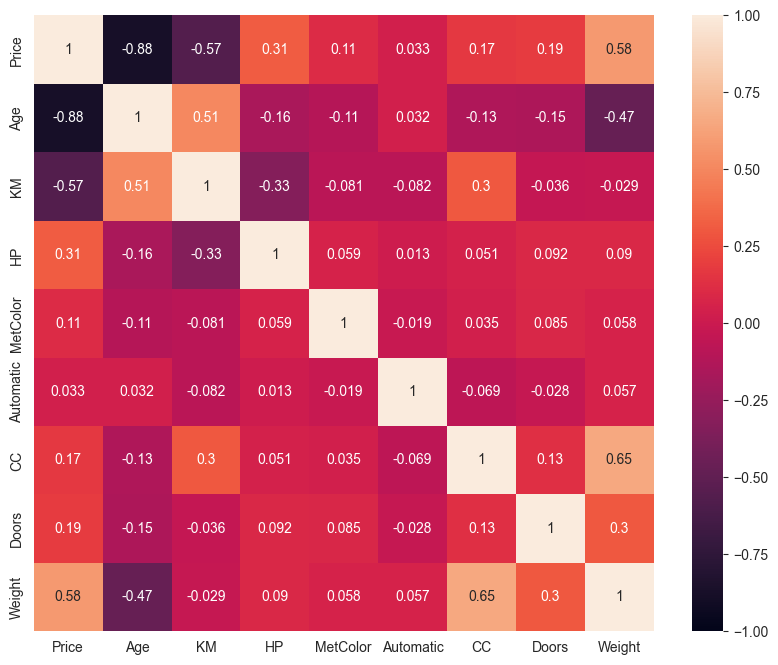

In [86]:
fig, ax = plt.subplots(figsize = (10, 8))
correlation_matrix = toyota.drop(['FuelType'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)


So this is very good, the correlation matrix tell us that with more Age, the Price goes down also with KM, they are *inversely proportional*, the opposite to CC and Weight they are proportional.

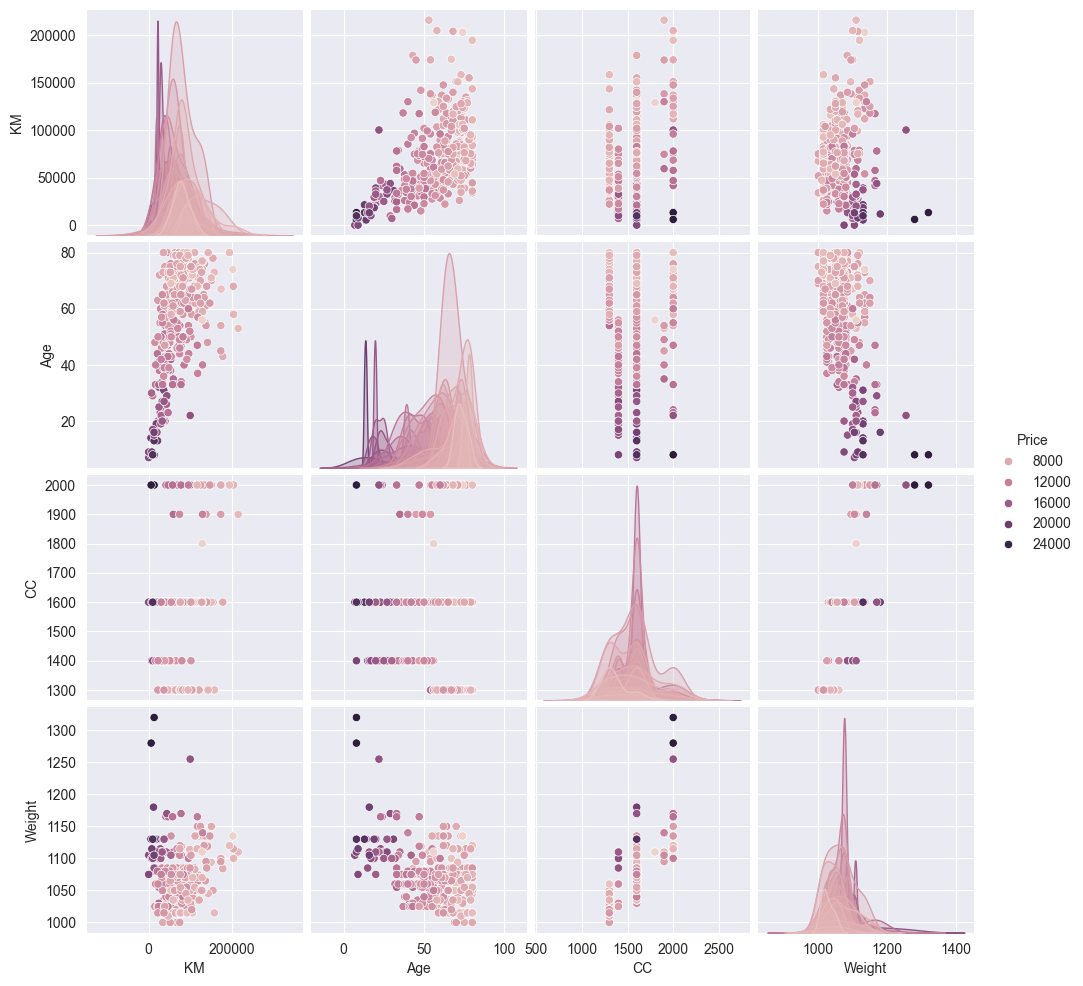

In [87]:
sample = toyota.sample(frac=.25)
sns.pairplot(sample, hue='Price', vars=('KM', 'Age', 'CC', 'Weight'))

So lets see a scatterplot and a regression in this 4 variables.

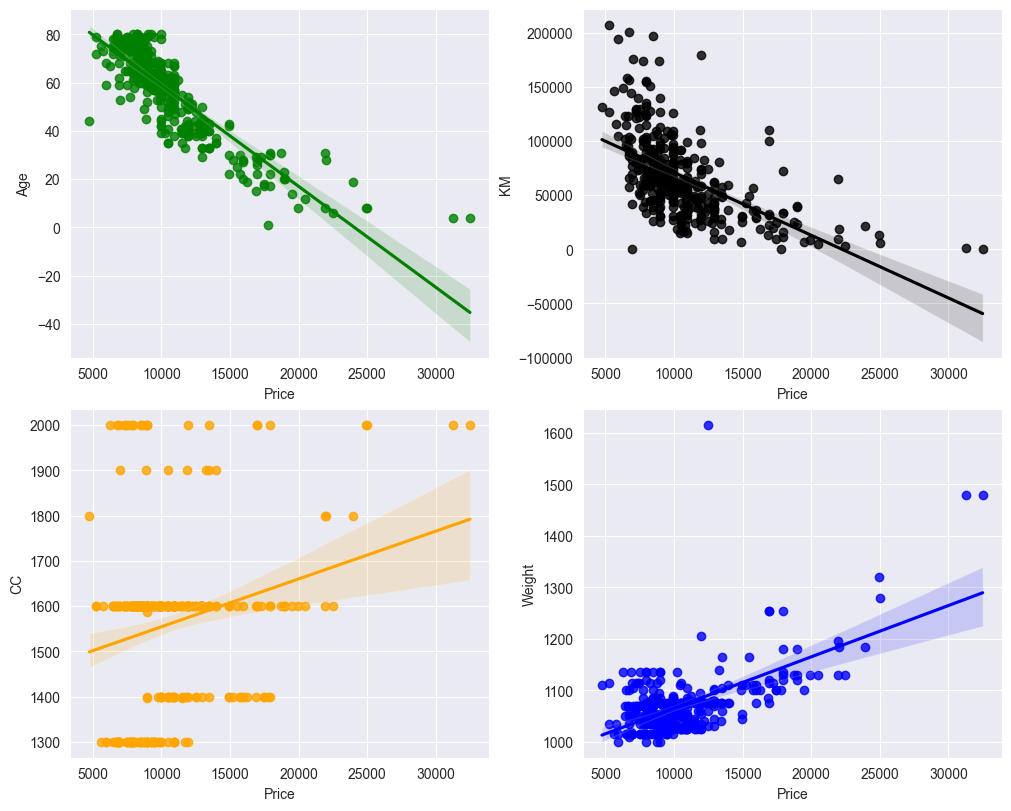

In [88]:
fig, axs = plt.subplots(2,2, layout='constrained', figsize=(10, 8))
sample_toyota = toyota.sample(frac= .25, random_state=42)

def age_lin(ax, fontsize = 14):
    sns.regplot(x=sample_toyota['Price'], y=sample_toyota['Age'], color='green', ax=ax)
def KM_lin(ax, fontsize = 14):
    sns.regplot(x=sample_toyota['Price'], y=sample_toyota['KM'], color ='black', ax=ax)
def CC_lin(ax, fontsize = 14):
    sns.regplot(x=sample_toyota['Price'], y=sample_toyota['CC'], color = 'orange',ax=ax)
def Weight_lin(ax, fontsize = 14):
    sns.regplot(x=sample_toyota['Price'], y=sample_toyota['Weight'], color='blue', ax=ax)
age_lin(axs[0, 0], fontsize=14)
KM_lin(axs[0, 1], fontsize=14)
CC_lin(axs[1, 0], fontsize=14)
Weight_lin(axs[1, 1], fontsize=14)

Looks one that is very important on the price is KM and Age, lets see a joint plot of the KM vs Price

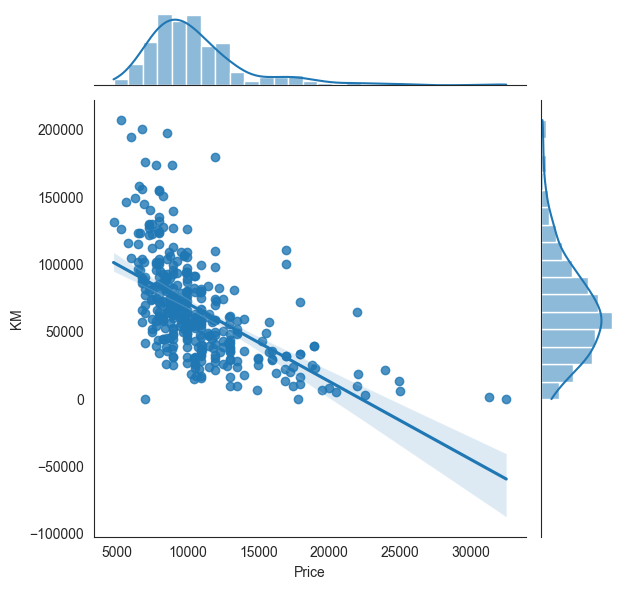

In [89]:
with sns.axes_style('white'):
    sns.jointplot(x=sample_toyota['Price'], y=sample_toyota['KM'],
                  data=sample_toyota, kind='reg')

FuelType distribution analysis

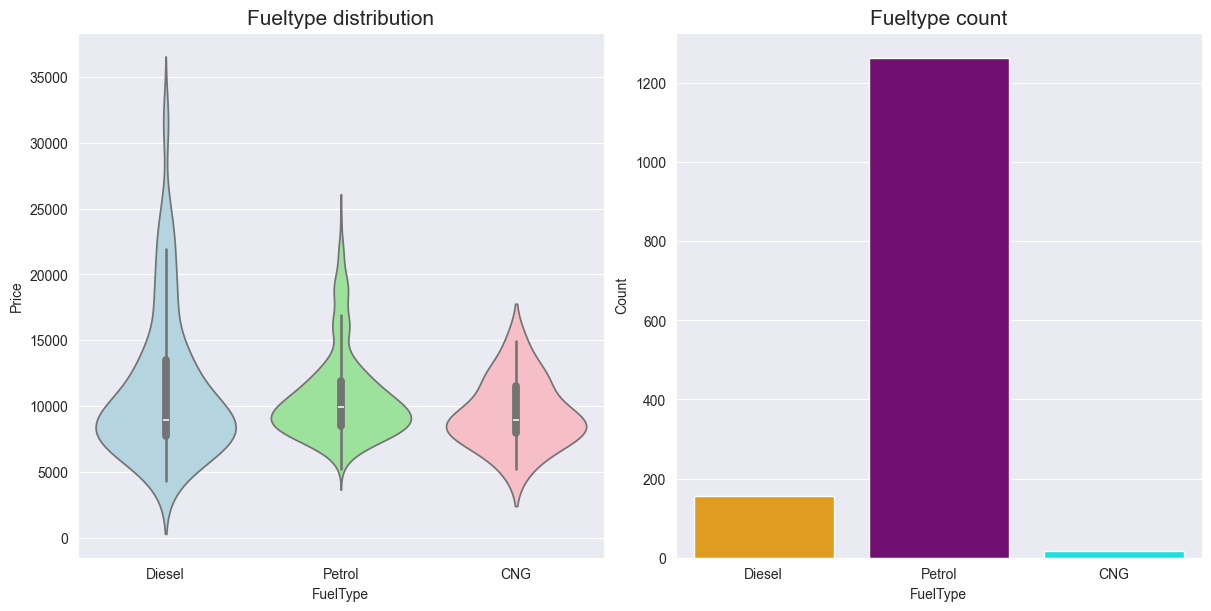

In [90]:
fueltype = toyota['FuelType']
price = toyota['Price']
Count = toyota.FuelType.count()

fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(12, 6))

def violin(ax, fontsize=14, hide_labels = False):
    sns.violinplot(x=fueltype, y=price, hue=fueltype, ax=ax,
                    palette=["lightblue", "lightgreen", "lightpink"])
    ax.set_title('Fueltype distribution', fontsize=fontsize+1)
    
def barplot(ax, fontsize=14, hide_labels = False):
    sns.countplot(x=fueltype, ax=ax, hue=fueltype,
                  palette=["orange", "purple", "cyan"])
    ax.set_title('Fueltype count', fontsize=fontsize+1)
    ax.set_ylabel('Count')

violin(axs[0], fontsize=14)
barplot(axs[1], fontsize=14)

Now for the regression models we are going to extract our features and target array

NOTE: to not drop FuelType we could use get_dummies

In [91]:
toyota = pd.get_dummies(toyota)
toyota.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,False,True,False
1,13750,23,72937,90,1,0,2000,3,1165,False,True,False
2,13950,24,41711,90,1,0,2000,3,1165,False,True,False
3,14950,26,48000,90,0,0,2000,3,1165,False,True,False
4,13750,30,38500,90,0,0,2000,3,1170,False,True,False


In [92]:
X = toyota.drop(['Price'], axis =1)
y = toyota[['Price']]
X.describe()


,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000
mean,55.947075,68533.259749,101.502089,0.674791,0.055710,1566.827994,4.033426,1072.45961
std,18.599988,37506.448872,14.981080,0.468616,0.229441,187.182436,0.952677,52.64112
min,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.00000
25%,44.000000,43000.000000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.00000
50%,61.000000,63389.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.00000
75%,70.000000,87020.750000,110.000000,1.000000,0.000000,1600.000000,5.000000,1085.00000
max,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.00000


In [93]:
y.describe()

,Price
count,1436.000000
mean,10730.824513
std,3626.964585
min,4350.000000
25%,8450.000000
50%,9900.000000
75%,11950.000000
max,32500.000000


The most expensive car costs 32500 euros, we are going to see which age have this car

In [94]:
toyota[toyota['Price'] == 32500]['Age']


109    4
Name: Age, dtype: int64

 Now we split the dataset into Training set and Test set:

In [ ]:
from sklearn.model_selection import train_test_split

In [96]:
print("X train: ",X_train.shape)
print("X test ",X_test.shape)
print("y train ",y_train.shape)
print("y test ",y_test.shape)


X train:  (1077, 11)
X test  (359, 11)
y train  (1077, 1)
y test  (359, 1)


### 4. Regression Models
#### **Linear regression**


In [97]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Model accuracy

In [98]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter

# 1. predict cross validation (k-fold Cross-Validation)
cv_linear = cross_val_score(estimator=model, X = X_train, y =y_train, cv=10)

# 2. predict r2 score train set results
y_pred_train = model.predict(X_train)
r2_linear_train = r2_score(y_train, y_pred_train)

# 3. predict r2 score the test set results
y_pred_test = model.predict(X_test)
r2_linear_test = r2_score(y_test, y_pred_test)

# 4. Root Mean Squared Error
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

print("Cross validation: ", cv_linear.mean())
print(f"R\u00B2 (train): ", r2_linear_train)
print(f"R\u00B2 (test): ", r2_linear_test)
print("RMSE: ", rmse_linear)


Cross validation:  0.8480754345159047
R² (train):  0.8702260786694702
R² (test):  0.8621869690956067
RMSE:  1398.4596051422193


In [99]:
print(f"Model slope:     {model.coef_[0]}\n")
print(f"Model intercept: {model.intercept_}")

Model slope:     [-1.21164453e+02 -1.48789981e-02  4.55824003e+01  1.04801739e+02
  2.36006714e+02 -3.12702199e+00 -3.16952768e+01  2.31842274e+01
 -1.21631013e+03  1.08295324e+03  1.33356891e+02]

Model intercept: [-6201.92777117]


With this we can predict the value of a Toyota Corolla

Lets compare the real values vs the predicted values:

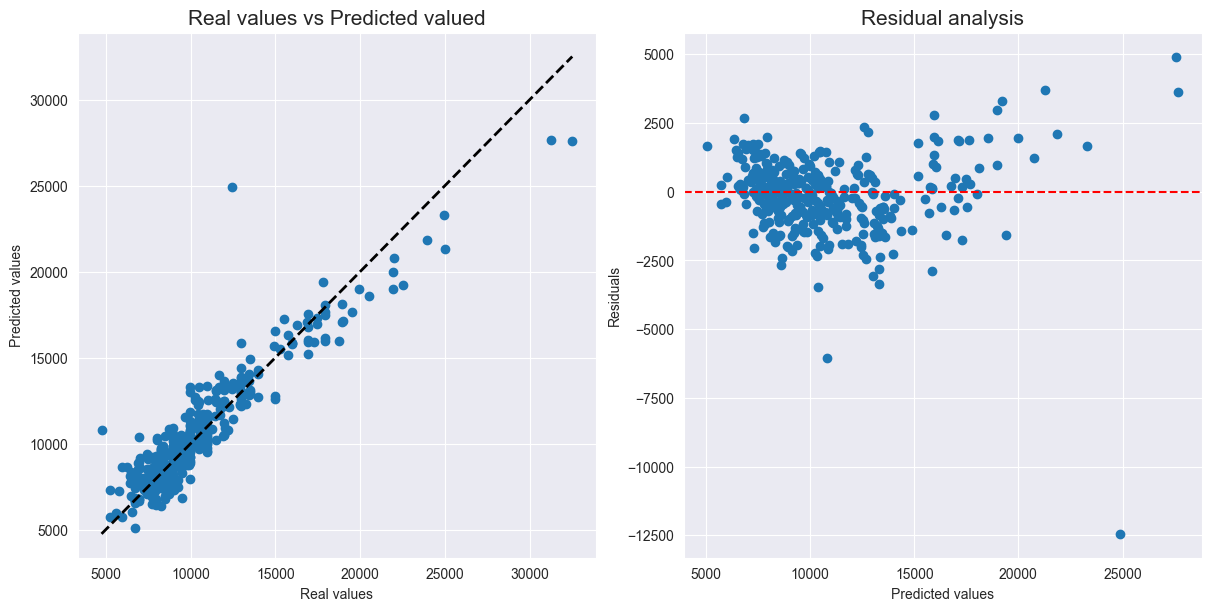

In [100]:
fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(12, 6))
linear_residuals = y_test-y_pred_test

def linear_comparision(ax, fontsize=14):
    ax.scatter(y_test, y_pred_test)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax.set_xlabel('Real values')
    ax.set_ylabel('Predicted values')
    ax.set_title('Real values vs Predicted valued', fontsize=fontsize+1)
def linear_residuals_analysis(ax, fontsize=14):
    ax.scatter(y_pred_test, linear_residuals)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Residual analysis', fontsize=fontsize+1)
linear_comparision(axs[0], fontsize=14)
linear_residuals_analysis(axs[1], fontsize=14)

#### **Polynomial Regression**

```Python
poly_model = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())
```
`PolynomialFeatures(degree=2):` Transforms the features (X) in a polynomic space grade 2

`LinearRegression():` Adjust a linear regression model to the transformed features

In [117]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
poly_model = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())

# 1. train the pipeline
poly_model.fit(X_train, y_train)

# 2. predict cross validation
cv_poly = cross_val_score(estimator=poly_model, X=X_train, y=y_train, cv=10)

# 3. predict in the sets of train and test
y_pred_train = poly_model.predict(X_train)
y_pred_test = poly_model.predict(X_test)

# 4. predict r2 score the test set results
r2_poly_train = r2_score(y_train, y_pred_train)
r2_poly_test = r2_score(y_test, y_pred_test)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Cross validation: {cv_poly.mean()}")
print(f"R\u00B2 (train):       {r2_poly_train}")
print(f"R\u00B2 (test):        {r2_poly_test}")
print(f"RMSE:             {rmse_poly}")

Cross validation: 0.7816871035920664
R² (train):       0.915708618549417
R² (test):        0.7619825732544561
RMSE:             1837.8461882535075


High $R^{2}$ means the model is overfitting because it memorizes the data but does not generalize

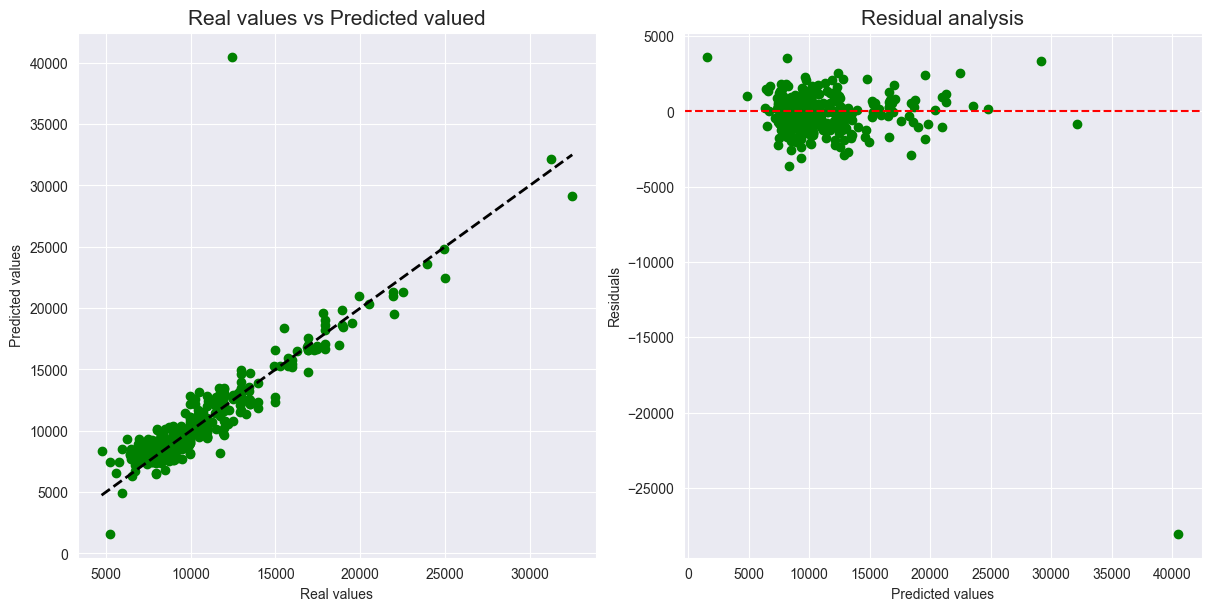

In [102]:
fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(12, 6))
poly_residuals = y_test-y_pred_test

def poly_comparision(ax, fontsize=14):
    ax.scatter(y_test, y_pred_test, color='green')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax.set_xlabel('Real values')
    ax.set_ylabel('Predicted values')
    ax.set_title('Real values vs Predicted valued', fontsize=fontsize+1)
def poly_residuals_analysis(ax, fontsize=14):
    ax.scatter(y_pred_test, poly_residuals, color='green')
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Residual analysis', fontsize=fontsize+1)
poly_comparision(axs[0], fontsize=14)
poly_residuals_analysis(axs[1], fontsize=14)

### **Gaussian Basis Function**
The GBF are radial functions, which means that they are closed in specific points and have a specific limit (controled by $\sigma$).

The formule of the Gaussian Function is:
$$
 exp\left(\frac{-distance^{2}}{2\sigma^{2}}\right)
$$

This transforms the distances into values between 0 and 1, where values close to 1 indicate that the point is close to the center, and values close to 0 indicate that it is far away.

Each $n_{centers}$ is a Gaussian Function which is centered in a point which be foumd ny KMeans,

The transformation converts the original features into new features based on the distance to the centers of the Gaussian functions.

Each new feature represents the “influence” of a center on a given point. If a point is close to a center, the Gaussian function will return a value close to 1. If it is far away, it will return a value close to 0.

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans


class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Transform features using GBF multi-dimensional"""
    def __init__(self, n_centers, sigma):
        self.n_centers=n_centers # clusters which will be used fot the GBFs
        self.sigma = sigma # controls the width of the gaussian functions 
    
    def fit(self, X, y=None):
        # Kmeans to find centers
        X = np.asarray(X, dtype=float) # we convert the data to Numpy because Kmeans need it
        kmeans = KMeans(n_clusters=self.n_centers, random_state=42)
        kmeans.fit(X) # Kmeans find the centers of the clusters in the space of the features
        self.centers_ = kmeans.cluster_centers_ # GBF centers
        return self # returns the instance of the class to allow chaining of methods (fit_transfomr)
    
    def transform(self, X):
        X = np.asarray(X, dtype=float) 
        distances = np.linalg.norm(X[:, np.newaxis] - self.centers_, axis=2) # <- 1. add a dimension to X to substract 
        return np.exp(-distances**2 / (2 * self.sigma**2))                   #    2. calcules the difference between X and centers
             # ^^^^^ applies the GBF this transform the distances (0-1)      #    3. calcules the euclidan distance between point-center        

# create the pipeline: GBF & LinearRegression
gaussian_model = make_pipeline(
    StandardScaler(),
    GaussianFeatures(n_centers=47, sigma=64.16),
    LinearRegression()
)

# 1. train the pipeline
gaussian_model.fit(X_train, y_train)

# 2. predict cross validation
cv_gaussian = cross_val_score(estimator=gaussian_model, X=X_train, y=y_train, cv=10)

# 3. predict in the sets of train and test
y_pred_train = gaussian_model.predict(X_train)
y_pred_test = gaussian_model.predict(X_test)

# 4. predict r2 score the test set results
r2_gaussian_train = r2_score(y_train, y_pred_train)
r2_gaussian_test = r2_score(y_test, y_pred_test)
rmse_gaussian = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Cross validation: {cv_gaussian.mean()}")
print(f"R\u00B2 (train):       {r2_gaussian_train}")
print(f"R\u00B2 (test):        {r2_gaussian_test}")
print(f"RMSE:             {rmse_gaussian}")


Cross validation: 0.8951451200315585
R² (train):       0.9114501852970208
R² (test):        0.8598781396804057
RMSE:             1410.1253868126685


#### _Find hyperparameters_
A way to find hyperparameters may be manual, but with Optuna, we can automate and optimize this process efficiently.

In [104]:
import optuna
def objective(trial):
    # logaritmic scale
    n_centers = trial.suggest_int('n_centers',1, 970, log=True)
    sigma = trial.suggest_float('sigma', 1e-3, 1e4, log=True)

    gaussian_model = make_pipeline(
    StandardScaler(),
    GaussianFeatures(n_centers=n_centers, sigma=sigma),
    LinearRegression()
)


    score = cross_val_score(gaussian_model, X_train, y_train, cv=10, scoring='r2').mean()
    return score

study = optuna.create_study(direction='maximize')  # Maximizar R²
study.optimize(objective, n_trials=5)            # Número de iteraciones

print("Best hyperparameter:", study.best_params)

[I 2025-01-25 00:55:06,299] A new study created in memory with name: no-name-c1db25d8-ae95-4f93-8aac-ffb3c36fcd40
[I 2025-01-25 00:55:19,663] Trial 0 finished with value: -186486534936.0947 and parameters: {'n_centers': 873, 'sigma': 0.0027635882453620223}. Best is trial 0 with value: -186486534936.0947.
[I 2025-01-25 00:55:28,636] Trial 1 finished with value: -14.769982768053765 and parameters: {'n_centers': 645, 'sigma': 272.3706578439891}. Best is trial 1 with value: -14.769982768053765.
[I 2025-01-25 00:55:28,913] Trial 2 finished with value: -0.02071702356389684 and parameters: {'n_centers': 1, 'sigma': 0.0018194707194380557}. Best is trial 2 with value: -0.02071702356389684.
[I 2025-01-25 00:55:29,504] Trial 3 finished with value: -0.020282176002801376 and parameters: {'n_centers': 51, 'sigma': 0.0024848770980378755}. Best is trial 3 with value: -0.020282176002801376.
[I 2025-01-25 00:55:29,769] Trial 4 finished with value: 0.788036373347055 and parameters: {'n_centers': 6, 'sigm

Best hyperparameter: {'n_centers': 6, 'sigma': 194.47958739516562}


For the Gaussian Basis function I used 50 `n_trials`

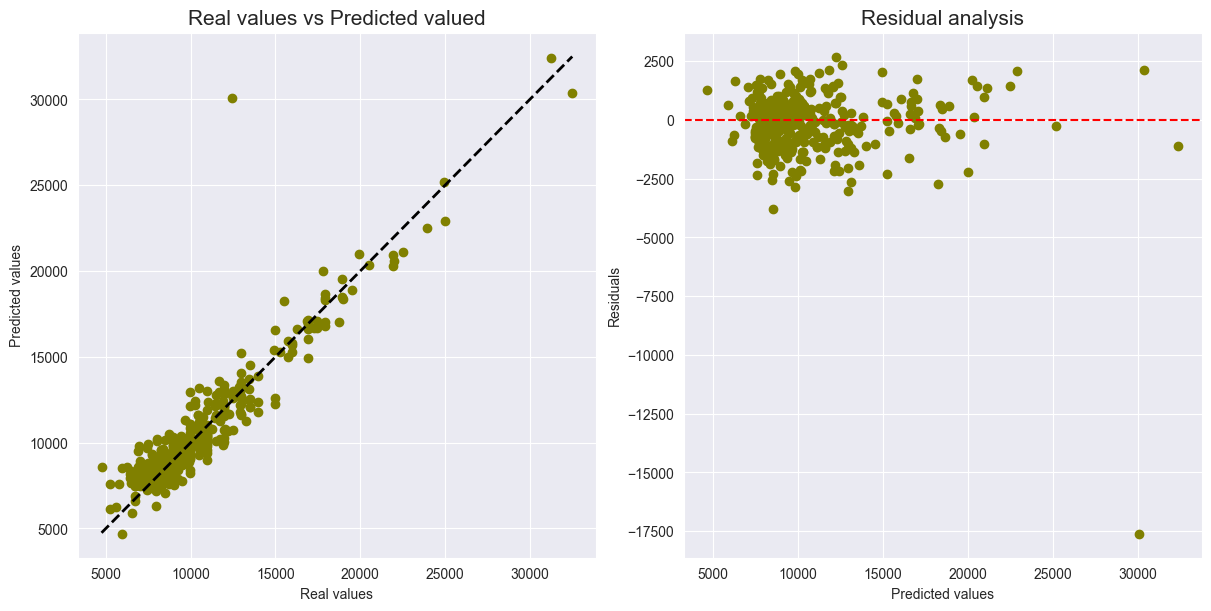

In [105]:
fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(12, 6))
gaussian_residuals = y_test-y_pred_test

def gaussian_comparision(ax, fontsize=14):
    ax.scatter(y_test, y_pred_test, color='olive')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax.set_xlabel('Real values')
    ax.set_ylabel('Predicted values')
    ax.set_title('Real values vs Predicted valued', fontsize=fontsize+1)
def gaussian_residuals_analysis(ax, fontsize=14):
    ax.scatter(y_pred_test, gaussian_residuals, color='olive')
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Residual analysis', fontsize=fontsize+1)
gaussian_comparision(axs[0], fontsize=14)
gaussian_residuals_analysis(axs[1], fontsize=14)

## *Regularization*
### **Lasso Regression ($L_1$ Regularization)**
Lasso Regression can exclude useless variables from equations, it is a little better than lasso Regression at reducing the Variance in models that contain useless variables.

The Lassio regression equation derives from the cost function that combine the mean quadratic equation (MSE), and the penalty $L_1$

Here the penalty is the **absolute value of the coefficients**
$$
Cost \;function = \frac{1}{2n} \sum_{i=1}^{n}{(y_i-\hat{y}_i)^{2}} + \alpha \sum_{j=1}^{p} |w_j| 
$$
where:
- $y_i$: real value for the objetive variable for $i$
- $\hat{y}_i$: predicted value by the model for the variable $i$ 
- $\alpha$: Regularization parameter (controls the strength of the penalty $L_1$) 

$$
\hat{y} = w_0 + w_1X_1 + w_2X_2 + \dots + w_pX_p
$$
where: 
- $w_0$: intercept (bias)
- $w_1, w_2\dots w_p$: feature coefficients

**Vectorial Form**

which in vectorial form is described like:
$$
Cost \;function = \frac{1}{2 n} ||\mathbf{y} - \mathbf{Xw}||^2_2 + \alpha ||\mathbf{w}||_1
$$
where:
- $||\;||_2$: Euclidean standard (quadratic error $L_1$) 
- $||\;||_1$: Standard $L_1$ (sum of absolute values of coefficients)

In [106]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

lasso_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=3),
    Lasso(alpha=2.36, tol=.0199, max_iter=2000, fit_intercept=True)
)        # for correct hyperparameter (a) check optuna, objetive, trial


# 1. train the pipeline
lasso_model.fit(X_train, y_train)

# 2. predict cross validation
cv_lasso = cross_val_score(estimator=lasso_model, X=X_train, y=y_train, cv=10)

# 3. predict in the sets of train and test
y_pred_train = lasso_model.predict(X_train)
y_pred_test = lasso_model.predict(X_test)

# 4. predict r2 score the test set results
r2_lasso_train = r2_score(y_train, y_pred_train)
r2_lasso_test = r2_score(y_test, y_pred_test)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Cross validation: {cv_lasso.mean()}")
print(f"R\u00B2 (train):       {r2_lasso_train}")
print(f"R\u00B2 (test):        {r2_lasso_test}")
print(f"RMSE:             {rmse_lasso}")


Cross validation: 0.7427712620108474
R² (train):       0.9273633923675705
R² (test):        0.9022945020939661
RMSE:             1177.5091354603258


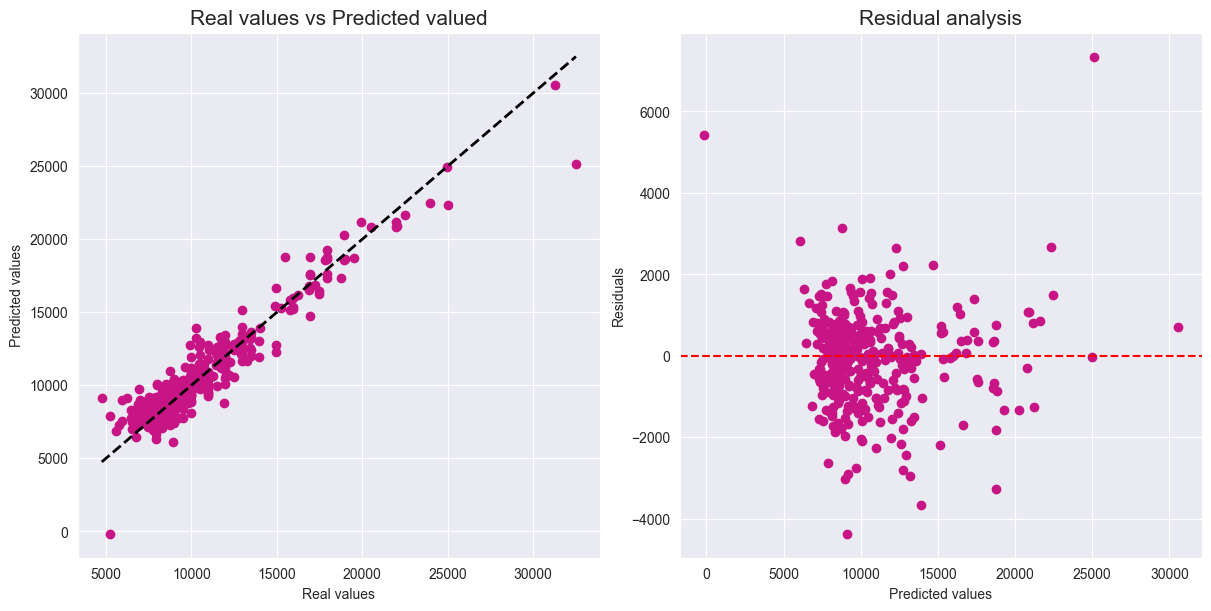

In [107]:
fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(12, 6))
# had to flatten the data because i
lasso_residuals = np.array([y_test]).flatten()-np.array([y_pred_test]).flatten()

def lasso_comparision(ax, fontsize=14):
    ax.scatter(y_test, y_pred_test, color='mediumvioletred')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax.set_xlabel('Real values')
    ax.set_ylabel('Predicted values')
    ax.set_title('Real values vs Predicted valued', fontsize=fontsize+1)
def lasso_residuals_analysis(ax, fontsize=14):
    ax.scatter(y_pred_test, lasso_residuals, color='mediumvioletred')
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Residual analysis', fontsize=fontsize+1)
lasso_comparision(axs[0], fontsize=14)
lasso_residuals_analysis(axs[1], fontsize=14)

### **Ridge Regression** ($L_2$ Regularization)
In contrast Ridge Regression, tends to do a little better when most variables are useful.

The Lassio regression equation derives from the cost function that combine the mean quadratic equation (MSE), and the penalty $L_2$

Here the penalty is the **absolute value of the coefficients** 
$$
Cost \;function = \frac{1}{2n} \sum_{i=1}^{n}{(y_i-\hat{y}_i)^{2}} + \alpha \sum_{j=1}^{p} w_j^{2}
$$
**Vectorial Form**

which in vectorial form is described like:
$$
Cost \;function = \frac{1}{2 n} ||\mathbf{y} - \mathbf{Xw}||^2_2 + \alpha ||\mathbf{w}||_1
$$

In [108]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

ridge_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=3),
    Ridge(alpha=1877.114456903404)
)

# 1. train the pipeline
ridge_model.fit(X_train, y_train)

# 2. predict cross validation
cv_ridge = cross_val_score(estimator=ridge_model, X=X_train, y=y_train, cv=10)

# 3. predict r2 in the sets of train and test
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)

# 4. predict r2 score the test set results
r2_ridge_train = r2_score(y_train, y_pred_train)
r2_ridge_test = r2_score(y_test, y_pred_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Cross validation: {cv_ridge.mean()}")
print(f"R\u00B2 (train):       {r2_ridge_train}")
print(f"R\u00B2 (test):        {r2_ridge_test}")
print(f"RMSE:             {rmse_ridge}")


Cross validation: 0.7787717366479003
R² (train):       0.8681555776986541
R² (test):        0.868626887665944
RMSE:             1365.3941207413986


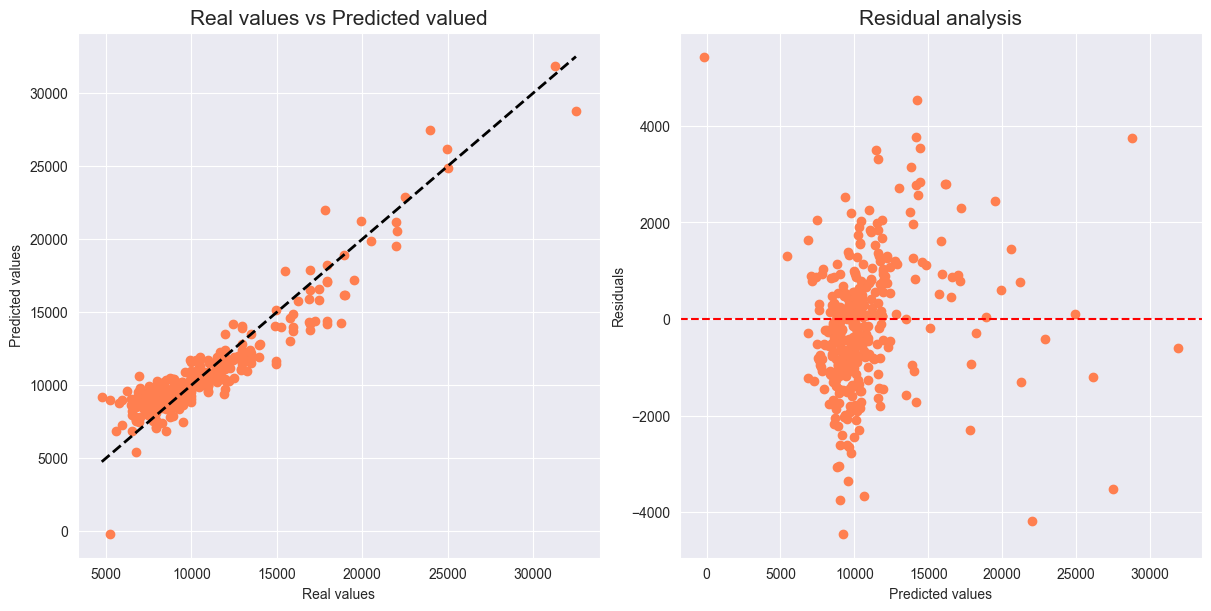

In [109]:
fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(12, 6))
# had to flatten the data because i
ridge_residuals = y_test-y_pred_test

def ridge_comparision(ax, fontsize=14):
    ax.scatter(y_test, y_pred_test, color='coral')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax.set_xlabel('Real values')
    ax.set_ylabel('Predicted values')
    ax.set_title('Real values vs Predicted valued', fontsize=fontsize+1)
def ridge_residuals_analysis(ax, fontsize=14):
    ax.scatter(y_pred_test, ridge_residuals, color='coral')
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Residual analysis', fontsize=fontsize+1)
ridge_comparision(axs[0], fontsize=14)
ridge_residuals_analysis(axs[1], fontsize=14)

### **Elastic-Net regression** 
Just like **Lasso** and **Ridge Regression**, Elastic-Net Regression starts with Least Squares then it combines the Lasso Regression Penalty with the Ridge Regression Penalty, altogether the Elastic Net Regression combines the strenghts of Lasso and Ridge regresssion.

By combining Lasso and Ridge, Elastic-Net regressiob groups and shrinks the paramters associated with the correlated variables and leaves them in equation or removes all at once. Its more **useful** when working with datasets that have highly correlated features or when the number of features is greater than the number of observations.

$$
Cost \;function = \sum_{i=1}^{n}{(y_i-\hat{y}_i)^{2}} + \lambda(\sum_{j=1}^{p} |w_j|+\alpha\frac{1-\alpha}{2}\sum_{j=1}^{p} w_j^{2})
$$
where:
- $\lambda:$ Regularization parameter that controls the strength of the penalty
- $\alpha:$ Parameter that controls the mixing betweeen $L_1$ and $L_1$
    - If $\alpha=1$, Elastic-Net reduces to Lasso
    - If $\alpha=0$, Elastic-Net reduses to Ridge
    - If $0 > \alpha > 1$ Elastic-Net is a combination of both


In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline

elastic_model = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=.06, l1_ratio=.08) # alpha is lambda and l1_ratio is alpha
)

# 1. train the pipeline
elastic_model.fit(X_train, y_train)

# 2. predict cross validation
cv_elastic = cross_val_score(estimator=elastic_model, X=X_train, y=y_train, cv=10)

# 3. predict r2 in the sets of train and test
y_pred_train = elastic_model.predict(X_train)
y_pred_test = elastic_model.predict(X_test)

# 4. predict r2 score the test set results
r2_elastic_train = r2_score(y_train, y_pred_train)
r2_elastic_test = r2_score(y_test, y_pred_test)
rmse_elastic = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Cross validation: {cv_elastic.mean()}")
print(f"R\u00B2 (train):       {r2_elastic_train}")
print(f"R\u00B2 (test):        {r2_elastic_test}")
print(f"RMSE:             {rmse_elastic}")

Cross validation: 0.8511337004933139
R² (train):       0.8682528338091836
R² (test):        0.8578510245360311
RMSE:             1420.288762972783


Because we got a low value of alpha, the penalty is very reduced, which means the coefficientes raise because $w$ is part of the mean squared error

_Finding hyperparameters_

```Python
import optuna
def objective(trial):
    # logaritmic scale
    alpha = trial.suggest_float('alpha',1e-3, 1e3, log=True) 
    l1_ratio = trial.suggest_float('l1_ratio', 1e-3, 1)

    elastic_model = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
)


    score = cross_val_score(elastic_model, X_train, y_train, cv=10, scoring='r2').mean()
    return score

study = optuna.create_study(direction='maximize')  # Maximizar R²
study.optimize(objective, n_trials=50)            # Número de iteraciones

print("Best hyperparameter:", study.best_params)```

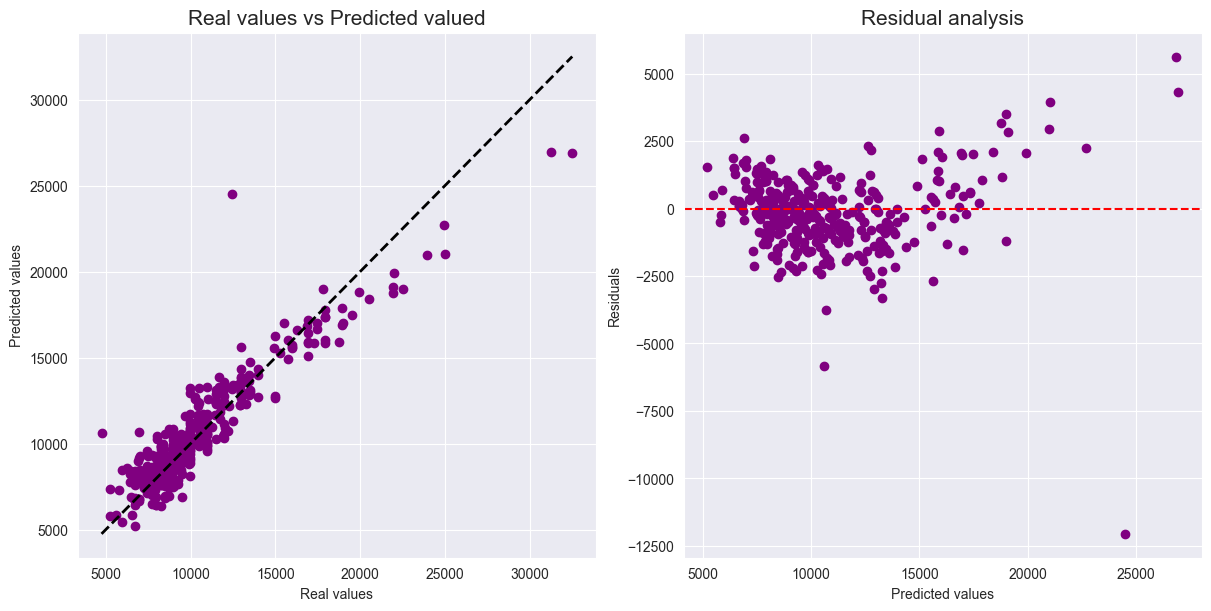

In [111]:
fig, axs = plt.subplots(1, 2, layout='constrained', figsize=(12, 6))
# had to flatten the data because i
elastic_residuals = np.array([y_test]).flatten()-np.array([y_pred_test]).flatten()

def elastic_comparision(ax, fontsize=14):
    ax.scatter(y_test, y_pred_test, color='purple')
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax.set_xlabel('Real values')
    ax.set_ylabel('Predicted values')
    ax.set_title('Real values vs Predicted valued', fontsize=fontsize+1)
def elastic_residuals_analysis(ax, fontsize=14):
    ax.scatter(y_pred_test, elastic_residuals, color='purple')
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Residual analysis', fontsize=fontsize+1)
elastic_comparision(axs[0], fontsize=14)
elastic_residuals_analysis(axs[1], fontsize=14)

## 5. Conclusion


In [112]:
models = ['Linear', 'Polynomial','GaussianBasis', 'Lasso', 'Ridge', 'Elastic-Net']
cv_models = [cv_linear.mean(), cv_poly.mean(), cv_gaussian.mean(), 
             cv_lasso.mean(), cv_ridge.mean(), cv_elastic.mean()]
r2_train_models = [r2_linear_train, r2_poly_train, r2_gaussian_train,
                    r2_lasso_train, r2_ridge_train, r2_gaussian_train]
r2_test_models = [r2_linear_test, r2_poly_test, r2_gaussian_test,
                   r2_lasso_test, r2_ridge_test, r2_elastic_test]
rmse_models = [rmse_linear, rmse_poly, rmse_gaussian,
                rmse_lasso, rmse_ridge, rmse_elastic]

reg_comparission = pd.DataFrame({
    'Model': models,
    'CV': cv_models,
    'R2_train': r2_train_models,
    'R2_test': r2_test_models,
    'RMSE':rmse_models
})
reg_comparission

,Model,CV,R2_train,R2_test,RMSE
0,Linear,0.848075,0.870226,0.862187,1398.459605
1,Polynomial,0.781687,0.915709,0.761983,1837.846188
2,GaussianBasis,0.895145,0.911450,0.859878,1410.125387
3,Lasso,0.742771,0.927363,0.902295,1177.509135
4,Ridge,0.778772,0.868156,0.868627,1365.394121
5,Elastic-Net,0.851134,0.911450,0.857851,1420.288763


<Axes: xlabel='Value', ylabel='Model'>

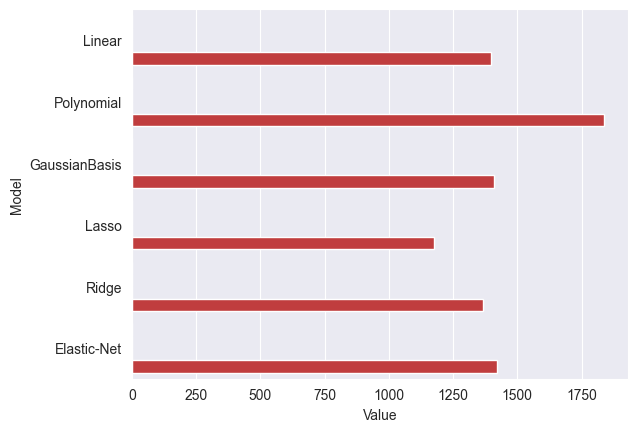

In [113]:
reg_melted = pd.melt(reg_comparission, id_vars="Model",
                      var_name="Metric", value_name='Value')
sns.barplot(reg_melted, x="Value", y="Model", hue='Metric', legend=False)


In [114]:
reg_melted

,Model,Metric,Value
0,Linear,CV,0.848075
1,Polynomial,CV,0.781687
2,GaussianBasis,CV,0.895145
3,Lasso,CV,0.742771
4,Ridge,CV,0.778772
5,Elastic-Net,CV,0.851134
6,Linear,R2_train,0.870226
7,Polynomial,R2_train,0.915709
8,GaussianBasis,R2_train,0.911450
9,Lasso,R2_train,0.927363


The best model for these data may be the gaussian and the elasticnet model because it had the best relationship between:
- higher R2
- lower loss of residuals

but the lasso regression also fit very well, the poly probably had an overadjustment

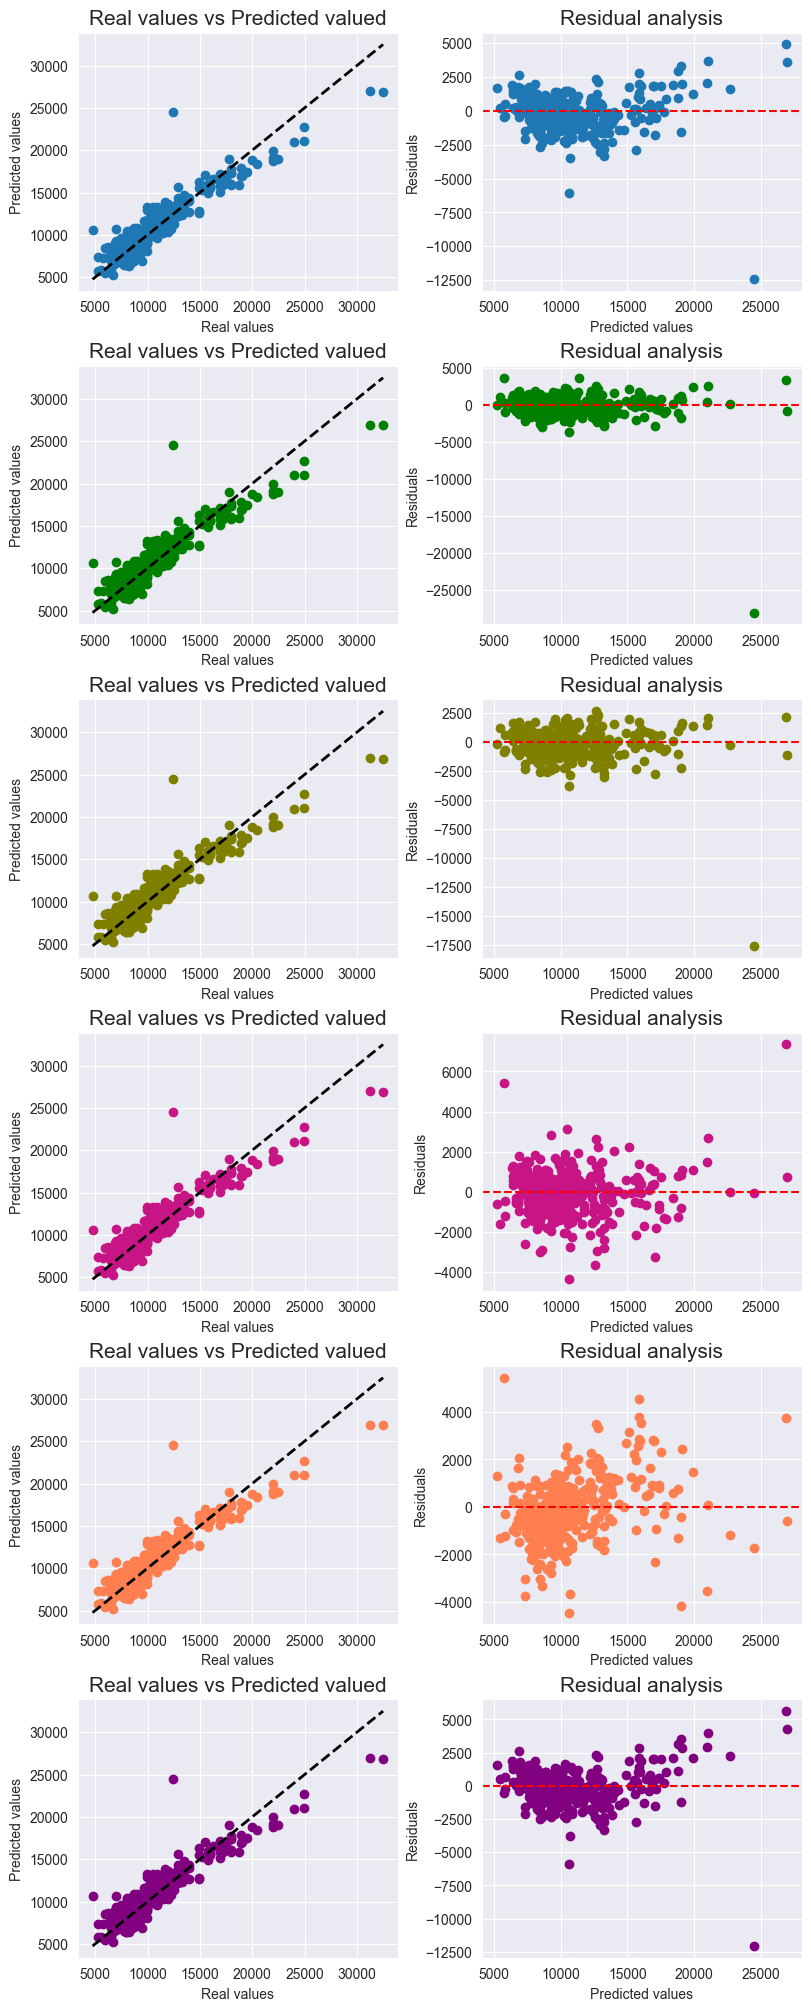

In [115]:
fig, axs = plt.subplots(6, 2, layout='constrained', figsize=(8, 20))

# lineal
linear_comparision(axs[0, 0])
linear_residuals_analysis(axs[0, 1])
# polynomial
poly_comparision(axs[1, 0])
poly_residuals_analysis(axs[1, 1])
# gaussian basis
gaussian_comparision(axs[2, 0])
gaussian_residuals_analysis(axs[2, 1])
# lasso
lasso_comparision(axs[3, 0])
lasso_residuals_analysis(axs[3, 1])
# ridge
ridge_comparision(axs[4, 0])
ridge_residuals_analysis(axs[4, 1])
# elastic-net
elastic_comparision(axs[5, 0])
elastic_residuals_analysis(axs[5, 1])
